In [3]:
import numpy as np
from collections import defaultdict
import re
import json
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns

In [4]:
friends = pd.read_csv('friends_transcripts.csv')

In [7]:
pd.set_option('display.max_colwidth', 50) #50 characters in the data frame
data=pd.DataFrame.from_dict(friends)
data.head()

,season_id,episode_id,scene_id,utterance_id,speaker,tokens,Transcripts
0,s01,e01,c01,u001,Monica Geller,"[['There', ""'s"", 'nothing', 'to', 'tell', '!']...",There's nothing to tell! He's just some guy I ...
1,s01,e01,c01,u002,Joey Tribbiani,"[[""C'mon"", ',', 'you', ""'re"", 'going', 'out', ...","C'mon, you're going out with the guy! There's ..."
2,s01,e01,c01,u003,Chandler Bing,"[['All', 'right', 'Joey', ',', 'be', 'nice', '...","All right Joey, be nice. So does he have a hum..."
3,s01,e01,c01,u004,Phoebe Buffay,"[['Wait', ',', 'does', 'he', 'eat', 'chalk', '...","Wait, does he eat chalk?"
4,s01,e01,c01,u005,unknown,[],NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67373 entries, 0 to 67372
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season_id     67373 non-null  object
 1   episode_id    67373 non-null  object
 2   scene_id      67373 non-null  object
 3   utterance_id  67373 non-null  object
 4   speaker       67373 non-null  object
 5   tokens        67373 non-null  object
 6   Transcripts   61310 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


Text(0.5, 1.0, 'Top 10 Characters by No. of Lines')

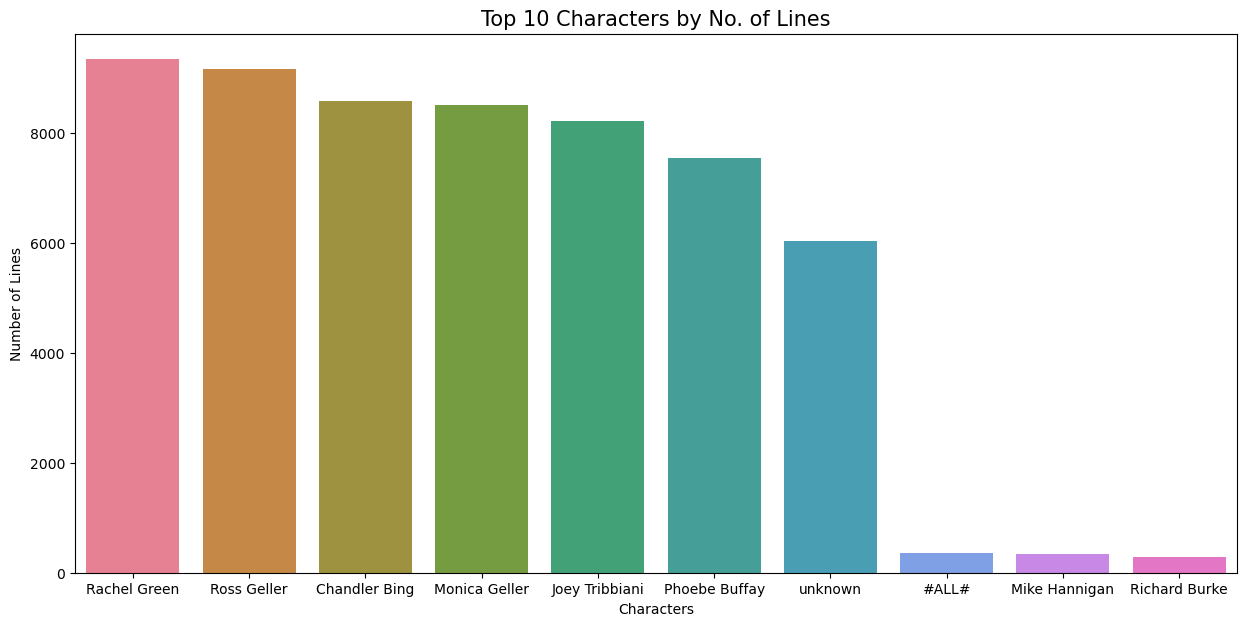

In [5]:
#visualising top 10 characters
speaker_per_rank = (data.speaker.value_counts()).index
plot_data = data[data.speaker.isin (speaker_per_rank[0:10])]
plt.figure(figsize=(15, 7))
sns.countplot(data= plot_data, x= 'speaker', order= speaker_per_rank[0:10], palette="husl")
plt.xlabel("Characters")
plt.ylabel("Number of Lines")
plt.title("Top 10 Characters by No. of Lines", fontsize=15)

In [6]:
#Seperate the data to be cleaned
data_b= data[['speaker','tokens']]
data_b['tokens'].unique()
data_b

,speaker,tokens
0,Monica Geller,"[['There', ""'s"", 'nothing', 'to', 'tell', '!']..."
1,Joey Tribbiani,"[[""C'mon"", ',', 'you', ""'re"", 'going', 'out', ..."
2,Chandler Bing,"[['All', 'right', 'Joey', ',', 'be', 'nice', '..."
3,Phoebe Buffay,"[['Wait', ',', 'does', 'he', 'eat', 'chalk', '..."
4,unknown,[]
...,...,...
67368,Chandler Bing,"[['Oh', ',', 'it', ""'s"", 'gon', 'na', 'be', 'o..."
67369,Rachel Green,"[['Do', 'you', 'guys', 'have', 'to', 'go', 'to..."
67370,Monica Geller,"[['We', 'got', 'some', 'time', '.']]"
67371,Rachel Green,"[['Okay', ',', 'should', 'we', 'get', 'some', ..."


In [9]:
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(pos_tag):

    if pos_tag.startswith('J'):
        
        return wordnet.ADJ

    elif pos_tag.startswith('V'):

        return wordnet.VERB

    elif pos_tag.startswith('N'):

        return wordnet.NOUN

    elif pos_tag.startswith('R'):

        return wordnet.ADV

    else:

        return wordnet.NOUN

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/6c06fdb6-5d00-4caf-9b1f-
[nltk_data]     b5d1ef16fd97/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/6c06fdb6-5d00-4caf-9b1f-
[nltk_data]     b5d1ef16fd97/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# A function to clean text    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):

    # lower text
    text = text.lower()

    # tokenize text for space and \n
    text = re.split('\s+|\n',text)
    
    # remove puncutation
    text = [word.strip(string.punctuation) for word in text]

    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # remove stop words
    stop = set(stopwords.words('english'))
    text = [x for x in text if x not in stop]

    # remove empty tokens
    text = [t for t in text if len(t) > 0]

    # pos tag text
    pos_tags = pos_tag(text)

    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # remove words with only one letter
    text = [t for t in text if len(t) > 1]

    # join all
    text = " ".join(text)

    return(text)

# call the function to clean text data
data["tokens_clean"] = data["tokens"].apply(lambda x: clean_text(x))


# Eliminate any row with no entry after cleaning 
data['tokens_clean'].replace('', np.NaN, inplace=True)
data.dropna(inplace=True)


In [10]:
data["tokens"].head()

0    [['There', "'s", 'nothing', 'to', 'tell', '!']...
1    [["C'mon", ',', 'you', "'re", 'going', 'out', ...
2    [['All', 'right', 'Joey', ',', 'be', 'nice', '...
3    [['Wait', ',', 'does', 'he', 'eat', 'chalk', '...
5    [['Just', ',', "'", 'cause', ',', 'I', 'do', "...
Name: tokens, dtype: object

In [45]:
data["tokens_clean"].head()

0                  nothing tell guy work
1    c'mon go guy get ta something wrong
2    right joey nice hump hump hairpiece
3                         wait eat chalk
5           cause n't want go go carl oh
Name: tokens_clean, dtype: object

In [26]:
print(data['tokens_clean'].isnull().sum())

0


In [376]:
#data_b = data[:20000]
#truncate dataset based on number of characters we want to verify
#threshold = 6
#data_thres = data[data.speaker.isin(speaker_per_rank[:threshold])]

# split the clean text in the rows  into list of words
#tokenized_data = data_thres["tokens_clean"].apply(lambda text: re.split(' ',text))

# Label Character
#label = preprocessing.LabelEncoder()
#target = label.fit_transform(data['speaker'].astype(str))
#data_thres['target'] = label.fit_transform(data_thres['speaker'].astype(str))
#target_thres = data_thres['target'] 
#my_tags = speaker_per_rank[0:threshold]

In [19]:
data.shape

(58720, 8)

In [20]:
from sklearn import preprocessing
from gensim.models.word2vec import Word2Vec
from nltk.tokenize import word_tokenize
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer

#vectorisation
count_vector = CountVectorizer(analyzer=word_tokenize)
X = count_vector.fit_transform(data['tokens_clean'])
print(X.shape)

(58720, 12858)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(data['tokens_clean'])
print(Z.shape)

(58720, 12575)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [24]:
#Splitting training and test data for CountVec
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()
y = leb.fit_transform(data['speaker'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

#Splitting training and test data for TFIDF
leb = LabelEncoder()
q = leb.fit_transform(data['speaker'])

from sklearn.model_selection import train_test_split

Z_train, Z_test, q_train, q_test = train_test_split(Z, q, test_size=0.4, random_state=20)

In [23]:
#Naive Bayes with CountVec
#Training classifier

mnb_clf = MultinomialNB(force_alpha=True)
mnb_clf = mnb_clf.fit(X_train, y_train)

#Testing Classifier

y_pred = mnb_clf.predict(X_test)
acc_cv = np.sum((y_pred == y_test).astype(int))/y_pred.size

In [25]:
print("accuracy: %4f" % (acc_cv))

accuracy: 0.247786


In [27]:
#Naive Bayes with TFIDF
#Training classifier

mnb_clf = MultinomialNB(force_alpha=True)
mnb_clf = mnb_clf.fit(Z_train, q_train)

#Testing Classifier

y_pred2 = mnb_clf.predict(Z_test)
acc_tfidf = np.sum((y_pred2 == q_test).astype(int))/y_pred2.size

In [28]:
print("accuracy: %4f" % (acc_tfidf))

accuracy: 0.236163


In [31]:
from sklearn.metrics import precision_recall_fscore_support as prfs

In [33]:
#Finding precision, Recall and F1-score with CountVec

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred, y_true=y_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred, y_true=y_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

Micro Evaluation: Precision: 0.2478; Recall: 0.2478; F1-Score: 0.2478
Macro Evaluation: Precision: 0.0028; Recall: 0.0033; F1-Score: 0.0029


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#Finding precision, Recall and F1-score with tfidf

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred2, y_true=q_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred2, y_true=q_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

Micro Evaluation: Precision: 0.2362; Recall: 0.2362; F1-Score: 0.2362
Macro Evaluation: Precision: 0.0028; Recall: 0.0031; F1-Score: 0.0027


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from tabulate import tabulate
scores=[["CountVec", acc_cv ],["TF-IDF",acc_tfidf]]
col_names= ["BoW Technique", "Accuracy Score"]
print(tabulate(scores, headers=col_names))

BoW Technique      Accuracy Score
---------------  ----------------
CountVec                 0.247786
TF-IDF                   0.236163


In [ ]:
#Logistic Regression
# Train classifier on CountVec
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
logreg_clf = logreg_clf.fit(X_train, y_train)

y_predL = logreg_clf.predict(X_test)
acc_cvL = np.sum((y_predL == y_test).astype(int)) / y_predL.size

In [ ]:
print("accuracy: %.4f" % (acc_cvL))

In [ ]:
#Logistic Regression
# Train classifier on TF-IDFF

logreg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
logreg_clf = logreg_clf.fit(Z_train, q_train)

y_predL2 = logreg_clf.predict(Z_test)
acc_cvL2 = np.sum((y_predL2 == q_test).astype(int)) / y_predL2.size

In [ ]:
print("accuracy: %.4f" % (acc_cvL2))

In [ ]:
#Cross Validation for model selection
from sklearn.model_selection import cross_val_score
import random
np.random.seed(42)
random.seed(32)

#countvec
scores = cross_val_score(logreg_clf, X, y, cv=5, scoring="f1_macro")
print(scores)
print(scores.mean())

#tf-idf
scores2 = cross_val_score(logreg_clf, Z, q, cv=5, scoring="f1_macro")
print(scores2)
print(scores2.mean())

In [ ]:
#GridSearch for model selection CountVec
logreg_l1_param_grid = {
    "C": np.logspace(-2, 1, 100),
    "penalty": [
        # 'l1',
        'l2',
        # 'elasticnet'
        # None,
    ]
}

logreg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)


logreg_gridcv = GridSearchCV(logreg_clf, logreg_l1_param_grid, scoring="f1_macro", verbose=3)
logreg_gridcv.fit(X_train, y_train)
import sys
# save all GridSearchCV results
print("logreg_gridcv.best_params_: ", file=sys.stdout)
print(logreg_gridcv.best_params_, file=sys.stdout)
print("logreg_gridcv.best_score_: ", file=sys.stdout)
print(logreg_gridcv.best_score_, file=sys.stdout)

In [ ]:
best_logreg_clf = logreg_gridcv.best_estimator_
logreg_clf = best_logreg_clf.fit(X_train, y_train)

In [ ]:
# Best estimator that is retrained on the whole training split (CountVec)
y_pred = logreg_clf.predict(X_test)

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred, y_true=y_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred, y_true=y_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

In [ ]:
#GridSearch for model selection TF-IDF
logreg_l1_param_grid = {
    "C": np.logspace(-2, 1, 100),
    "penalty": [
        # 'l1',
        'l2',
        # 'elasticnet'
        # None,
    ]
}

logreg_clf2 = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)


logreg_gridcv2 = GridSearchCV(logreg_clf2, logreg_l1_param_grid, scoring="f1_macro", verbose=3)
logreg_gridcv2.fit(Z_train, q_train)
import sys
# save all GridSearchCV results
print("logreg_gridcv.best_params_: ", file=sys.stdout)
print(logreg_gridcv.best_params_, file=sys.stdout)
print("logreg_gridcv.best_score_: ", file=sys.stdout)
print(logreg_gridcv.best_score_, file=sys.stdout)

In [ ]:
best_logreg_clf2 = logreg_gridcv2.best_estimator_
logreg_clf2 = best_logreg_clf2.fit(Z_train, q_train)

In [ ]:
# Best estimator that is retrained on the whole training split (TF-IDF
y_pred2 = logreg_clf2.predict(Z_test)

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred2, y_true=q_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred2, y_true=q_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))